## Tips Dataframe

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

### Description

In [2]:
df=pd.read_csv("tips.csv")

In [3]:
print (('The data has the following shape'), df.shape)
print ("\n")
df.info()

The data has the following shape (244, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df = df.rename(columns={'total_bill': 'Bill', 'tip':'Tip', 'sex':'Gender', 'smoker':'Smoker', 'day':'Day','time':'Time', 'size': 'Party'})
df.head()

,Bill,Tip,Gender,Smoker,Day,Time,Party
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.describe()

,Bill,Tip,Party
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


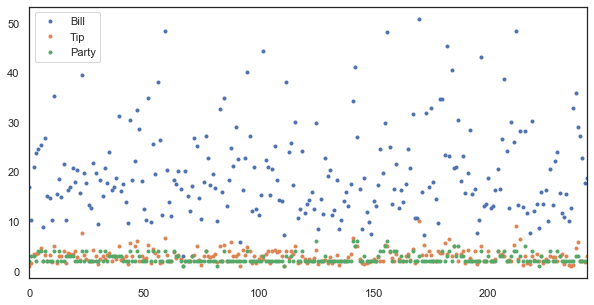

In [7]:
df.plot(style = "o", ms=3, figsize = [10,5])
plt.show()
#Ref1: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
#Ref2:http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/

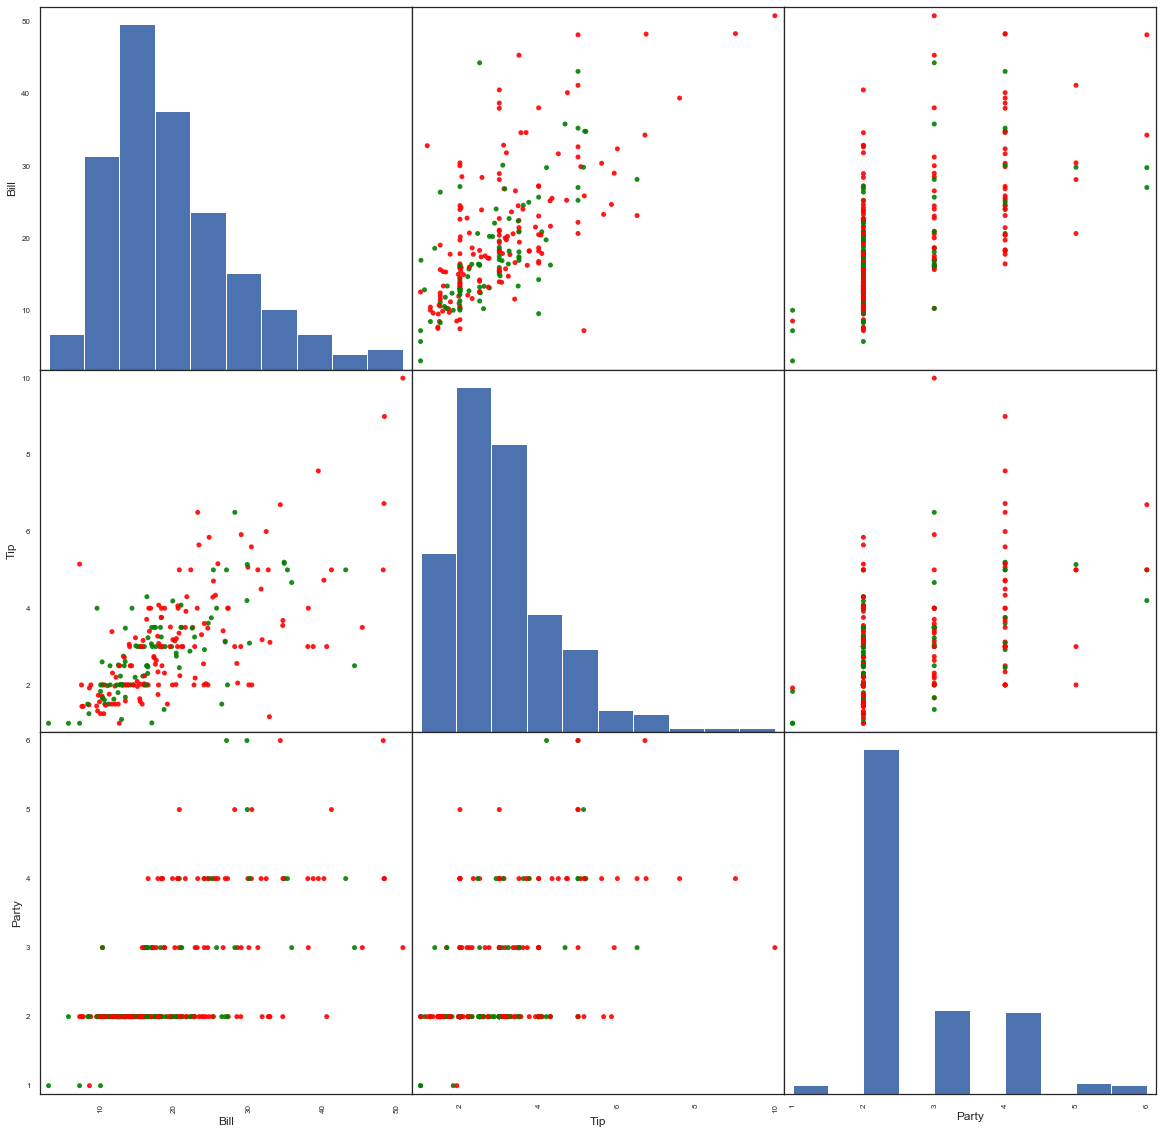

In [8]:
color_list = ['red' if i=='Male' else 'green' for i in df.loc[:,'Gender']]

pd.plotting.scatter_matrix(df, alpha=0.9, c = color_list, figsize = [20,20],
            diagonal = 'hist', s = 100, marker = '.')
plt.show()

Text(0, 0.5, 'Tip Amount')

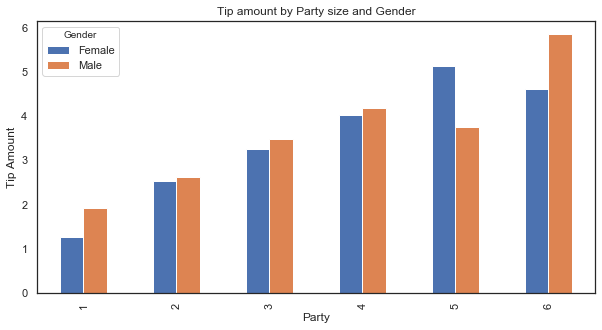

In [9]:
df.groupby(['Gender', 'Party'])['Tip'].mean().unstack(level=0).plot(kind='bar', figsize=(10,5))
plt.title('Tip amount by Party size and Gender')
plt.ylabel('Tip Amount')

In [10]:
df['Tippc']=df.apply(lambda row: row.Tip / row.Bill, axis=1)
# Ref: https://kaijento.github.io/2017/04/22/pandas-create-new-column-sum/
# Tippc is the percent of the tip relative to the Bill

In [11]:
df.head()

,Bill,Tip,Gender,Smoker,Day,Time,Party,Tippc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


Text(0, 0.5, 'Tip Amount as a percentage of the Bill')

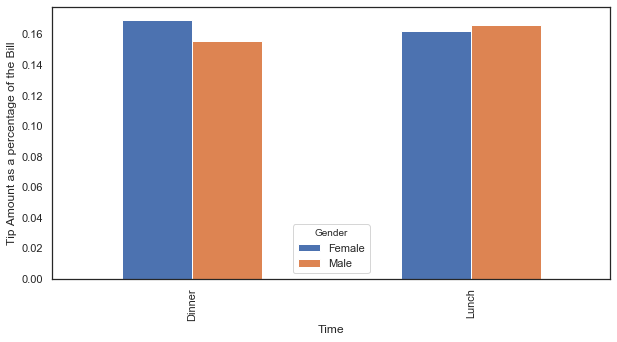

In [12]:
df.groupby(['Gender', 'Time'])['Tippc'].mean().unstack(level=0).plot(kind='bar', figsize=(10,5))
plt.ylabel('Tip Amount as a percentage of the Bill')

In [13]:
#df2 = df(columns=['Gender', 'Time'])
#df2 #.plot.bar()

### Linear Regression
- Plot the Tips relative to the Bill amount.

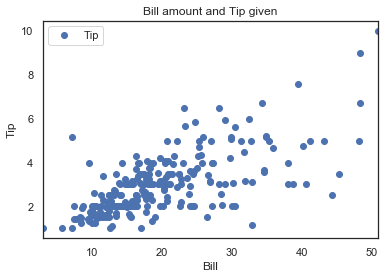

In [14]:
df.plot(x='Bill', y='Tip', style='o')  
plt.title('Bill amount and Tip given')  
plt.xlabel('Bill')  
plt.ylabel('Tip')  
plt.show()

- Looking at where the dots, it would seem that the Tip amount increases relative to the Bill amount. It would seem that the Tip is approximate 20 % of the Bill amount. There are a few outliers that could skew the data.
- I will try a few values for the slope and where it crosses the Y-axis. The slopes I will at will vary between 0.1 and 0.2. (I did try a number of other values, but for this analysis I will use the outlined values). 

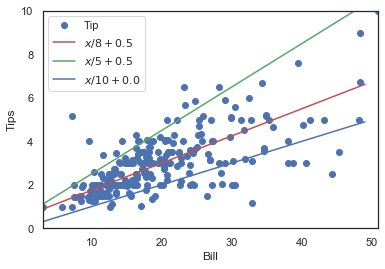

In [15]:
# Plot w versus d with black dots.
df.plot(x='Bill', y='Tip', style='o')

# Overlay some lines on the plot.
x = np.arange(0.0, 50.0, 1.0)
plt.plot(x, 0.125 * x + 0.5, 'r-', label=r"$x/8 + 0.5$")
plt.plot(x, 0.2 * x +  0.5, 'g-', label=r"$x/5 +  0.5$")
plt.plot(x, 0.1 * x + 0.0, 'b-', label=r"$x/10 + 0.0$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Bill')
plt.ylabel('Tips')
# Adjust the plot range
plt.ylim(0, 10)
# Show the plot.
plt.show()

- The red line seems to be the best fit. But I will investigate using the least square technique. In the above table, for every x, there is two values for y, one on the line and one on the dot. The following measures this distance and squares it (to account for negative values). The lease value is the best guess for the lines in the plot. 

In [16]:
B = df["Bill"]
T = df["Tip"]

cost = lambda m,c: np.sum([(T[i] - m * B[i] - c)**2 for i in range(B.size)])

print("Red line cost with m = %5.2f and c = %5.2f: is %8.2f" % (0.125, 0.50, cost(0.125, 0.5)))
print("Green line cost with m = %5.2f and c = %5.2f: is %8.2f" % (0.2,  0.5, cost(0.2,  0.5)))
print("Blue line cost with m = %5.2f and c = %5.2f: is %8.2f" % (0.1, 0.0, cost(0.1, 0.0)))

Red line cost with m =  0.12 and c =  0.50: is   260.63
Green line cost with m =  0.20 and c =  0.50: is   945.84
Blue line cost with m =  0.10 and c =  0.00: is   506.98


### Minimising the cost

In [17]:
# Calculate the best values for m and c.

B = df["Bill"]
T = df["Tip"]

# Calculate the best values for B and T.
B_avg = df["Bill"].mean()
T_avg = df["Tip"].mean()

B_zero = B - B_avg
T_zero = T - T_avg

m = np.sum(B_zero * T_zero) / np.sum(B_zero * B_zero)
c = T_avg - m * B_avg

print ("m is %8.6f and c is %6.6f." % (m, c))


x, y, x_avg, y_avg = B, T, B_avg, T_avg
m2 = (np.sum(x * y) - y_avg * np.sum(x)) / (np.sum(x * x) - x_avg * np.sum(x))
c2 = y_avg - m2 * x_avg
m2, c2

m is 0.105025 and c is 0.920270.


(0.10502451738435345, 0.9202696135546717)

In [18]:
np.polyfit(B, T, 1)

array([0.10502452, 0.92026961])

- The line the minimises the cost can now be superimposed on the data.

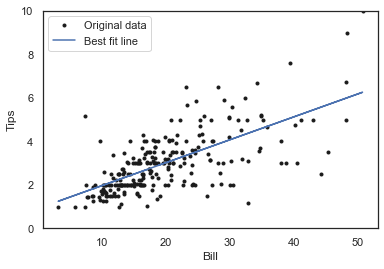

In [19]:
# Plot the best fit line.
plt.plot(B, T, 'k.', label='Original data')
plt.plot(B, m * B + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Bill')
plt.ylabel('Tips')
plt.legend()

plt.ylim(0, 10)
# Show the plot.
plt.show()

In [28]:
cost = lambda m,c: np.sum([(T[i] - m * B[i] - c)**2 for i in range(B.size)])

print("Red line cost with m = %5.2f and c = %5.2f: is %8.2f" % (0.105025, 0.920270, cost(0.11, 0.92)))

Red line cost with m =  0.11 and c =  0.92: is   255.62


- In the case of linear regression, the cost function is the sum of the squares of the residuals (residuals being the difference between the dependent variable value and the value given by the model). The procedure finds for you the intercept and slope(s) that minimize the cost function.
- This is why the linear regression method is also called “Least-squares regression”.
- A line with slope =  0.11 and y-axia =  0.92: gives the lowest cost function, at 255.62.
- So this equation best fits the line.

In [21]:
from statsmodels.formula.api import ols

fit = ols('Tip ~ (Bill)', data=df).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           6.69e-34
Time:                        20:04:21   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
Bill           0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.api as sm

X = df['Bill']
y = df['Tip']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           6.69e-34
Time:                        20:04:21   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

- Ref: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8
- Looking at both coefficients, we have a p-value that is equal to 0. This means that there is a strong correlation between these coefficients and the target (Tip).
- The R² value is equal to 0.45. Therefore, about 45% of the variability of Tips is explained by the Bill amount.

### Analysis
- Analyse the relationship between the variables within the dataset.
- The aim of this experiment is to determine what circumstances maxamises the Tip payable, this is done by minimising the Cost(m,c). Of course the data outlined above doesn't take into account, time, gender, smoker, so the model is not entirely accurate.  

<Figure size 432x288 with 0 Axes>

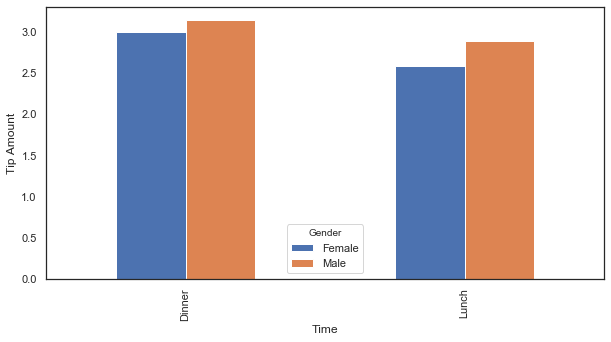

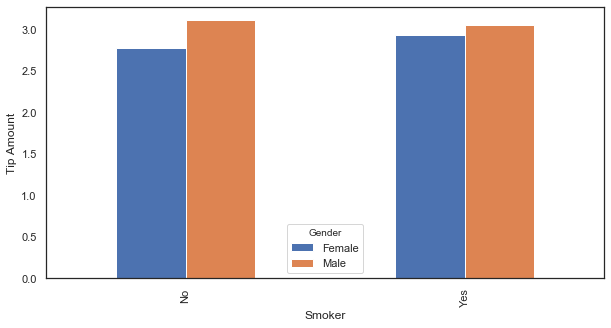

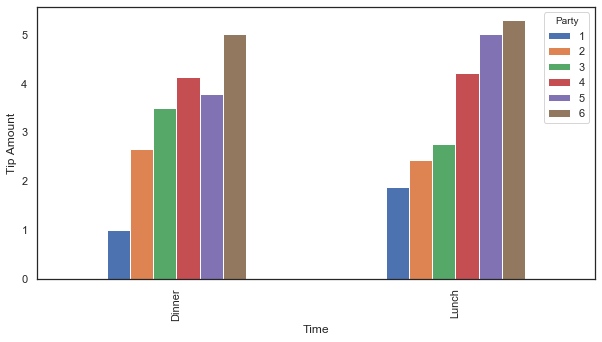

In [23]:
plt.figure(1)
df.groupby(['Gender', 'Time'])['Tip'].mean().unstack(level=0).plot(kind='bar', figsize=(10,5))
plt.ylabel('Tip Amount')

plt.figure(2)
df.groupby(['Gender', 'Smoker'])['Tip'].mean().unstack(level=0).plot(kind='bar', figsize=(10,5))
plt.ylabel('Tip Amount')

plt.figure(3)
df.groupby(['Party', 'Time'])['Tip'].mean().unstack(level=0).plot(kind='bar', figsize=(10,5))
plt.ylabel('Tip Amount')


plt.show()

In [26]:
B = df["Bill"]
T = df["Tip"]
P = df["Party"]

In [33]:
C = np.polyfit(P, T, 1)
C

array([0.71182064, 1.16913303])

In [34]:
m = 0.71182064
c = 1.16913303

cost = lambda m,c: np.sum([(T[i] - m * P[i] - c)**2 for i in range(P.size)])

print("Red line cost with m = %5.2f and c = %5.2f: is %8.2f" % (0.71182064, 1.16913303, cost(0.71182064, 1.16913303)))

Red line cost with m =  0.71 and c =  1.17: is   353.83


In [35]:
X = df['Party']
y = df['Tip']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Tip   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     76.18
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           4.30e-16
Time:                        20:20:27   Log-Likelihood:                -391.56
No. Observations:                 244   AIC:                             787.1
Df Residuals:                     242   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1691      0.223      5.233      0.0

In [24]:
df['Smokes'] = df.Smoker.map({'No': 0, 'Yes': 1})

ValueError: Argument Z must be 2-dimensional.

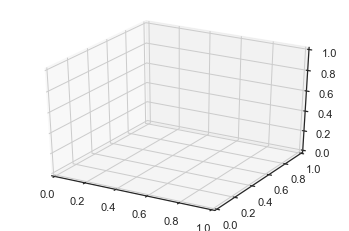

In [25]:
from mpl_toolkits.mplot3d import axes3d
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = (df.Party, df.Bill, df.Time)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

df['Sex_male']=df.Gender.map({'Female':False,'Male':True})
df['Smokes'] = df.Smoker.map({'No': False, 'Yes': True})
df['Dinner'] = df.Time.map({'Lunch': False, 'Dinner': True})
df['Day_w'] = df.Day.map({'Sun': 0, 'Mon': 1, 'Tue' : 2, 'Wed' : 3, 'Thu' : 4, 'Fri': 5, 'Sat': 6 })

In [ ]:
df.info()

from statsmodels.formula.api import ols

fit = ols('Tip ~ C(Sex_male) + C(Smokes) + C(Dinner)', data=df).fit() 

fit.summary()

- https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate